<a href="https://colab.research.google.com/github/Yagr49/RL_education/blob/main/HW_Classic_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install libs

In [2]:
%%capture
!pip install gymnasium pygame -q
!git clone https://github.com/MattChanTK/gym-maze.git
!cd gym-maze && python3 setup.py install

In [3]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import gymnasium as gym

import warnings
warnings.filterwarnings('ignore')

# Create policy

In [4]:
def get_epsilon_greedy_action(q_values, epsilon, action_n):

    policy = np.ones(action_n) * epsilon / action_n
    max_action = np.argmax(q_values)
    policy[max_action] += 1 - epsilon

    return np.random.choice(np.arange(action_n), p=policy)

# Create algorithm

In [5]:
def SARSA(env, episode_n, gamma: np.float64, trajectory_len: np.int8, alpha: np.float64):
    total_rewards = np.zeros(episode_n)  # Создаем массив для хранения общих вознаграждений для каждого эпизода

    state_n = env.observation_space.n  # Получаем количество состояний в среде
    action_n = env.action_space.n  # Получаем количество действий в среде
    qfunction = np.zeros((state_n, action_n))  # Создаем Q-функцию (матрицу состояние-действие) и инициализируем её нулями

    for episode in range(episode_n):  # Запускаем цикл для каждого эпизода
        epsilon = 1 / (episode + 1)  # Уменьшаем параметр epsilon для epsilon-жадной стратегии с каждым эпизодом

        state = env.reset()[0]  # Сбрасываем среду и получаем начальное состояние
        action = get_epsilon_greedy_action(qfunction[state], epsilon, action_n)  # Получаем действие с использованием epsilon-жадной стратегии

        for _ in range(trajectory_len):  # Запускаем цикл для каждого шага внутри эпизода (ограниченного trajectory_len)
            next_state, reward, done, _, _ = env.step(action)  # Выполняем выбранное действие и получаем следующее состояние, вознаграждение и флаг завершения
            next_action = get_epsilon_greedy_action(qfunction[next_state], epsilon, action_n)  # Получаем следующее действие с использованием epsilon-жадной стратегии

            qfunction[state][action] += alpha * (reward + gamma * qfunction[next_state][next_action] - qfunction[state][action])  # Обновляем Q-функцию согласно формуле метода SARSA

            state = next_state  # Переходим в следующее состояние
            action = next_action  # Переходим в следующее действие

            total_rewards[episode] += reward  # Добавляем полученное вознаграждение к общему вознаграждению текущего эпизода

            if done:  # Если эпизод завершился, выходим из цикла
                break

    return total_rewards  # Возвращаем массив общих вознаграждений для каждого эпизода

In [6]:
def QLearning(env, episode_n, noisy_episode_n, gamma: np.float64, t_max: np.int8, alpha: np.float64):
    state_n = env.observation_space.n  # Получаем количество состояний в среде
    action_n = env.action_space.n  # Получаем количество действий в среде

    Q = np.zeros((state_n, action_n))  # Создаем Q-функцию (матрицу состояние-действие) и инициализируем её нулями
    epsilon = 1  # Инициализируем действием рандомный шанс

    total_rewards = []  # Создаем массив для хранения общих вознаграждений для каждого эпизода
    for episode in range(episode_n):  # Запускаем цикл для каждого эпизода

        total_reward = 0  # Инициализируем общую сумму вознаграждений для каждого эпизода
        state, _ = env.reset()  # Инициализируем состояние и действие в среде

        for t in range(t_max):  # Запускаем цикл для каждого шага в эпизоде

            # Делаем действие с рандомным шансом epsilon

            action = get_epsilon_greedy_action(Q[state], epsilon, action_n)  # Делаем действие с шансом epsilo
            next_state, reward, done, _, _ = env.step(action)  # Делаем шаг в среде и получаем результат

            Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action])  # Обновляем Q-функцию

            total_reward += reward  # Добавляем вознаграждение к общей сумме вознаграждений для эпизода

            if done:  # Если эпизод завершён, то выходим из цикла
                break

            state = next_state  # Обновляем состояние в среде

        epsilon = max(0, epsilon - 1 / noisy_episode_n)  # Обновляем действием шанс

        total_rewards.append(total_reward)  # Добавляем вознаграждение к общей сумме вознаграждений для эпизода

    return total_rewards  # Возвращаем общие вознаграждения для каждого эпизода

# GridSearchCV

In [8]:
model_dict = {'SARSA':SARSA, 'QLearning':QLearning}
model_parametrs = {
        'gamma':[0.1, 0.5, 0.99],
        'trajectory_len':[100, 1000, 5000],
        'alpha':[0.1,0.5,0.99]
    }


# Train and visual

gamma check for SARSA:   0%|          | 0/3 [00:00<?, ?it/s]

trajectory_len check for SARSA:   0%|          | 0/3 [00:00<?, ?it/s]


alpha check for SARSA:   0%|          | 0/3 [00:00<?, ?it/s]



Model:SARSA; gamma:0.1; trajectory_len:100; alpha:0.1



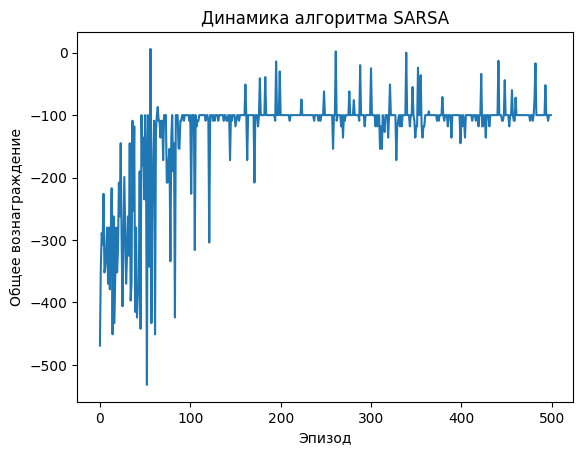




alpha check for SARSA:  33%|███▎      | 1/3 [00:03<00:07,  3.85s/it]



Model:SARSA; gamma:0.1; trajectory_len:100; alpha:0.5



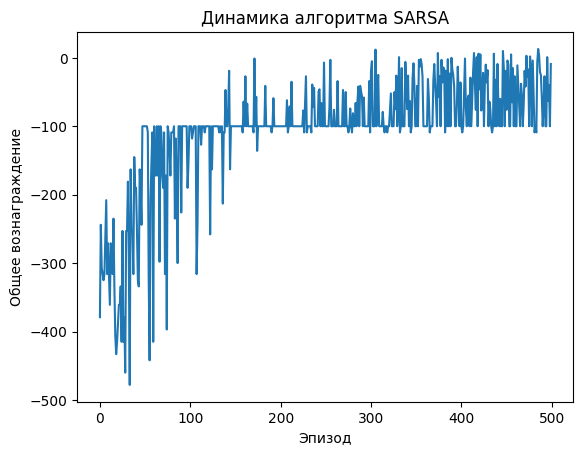




alpha check for SARSA:  67%|██████▋   | 2/3 [00:07<00:03,  3.57s/it]



Model:SARSA; gamma:0.1; trajectory_len:100; alpha:0.99



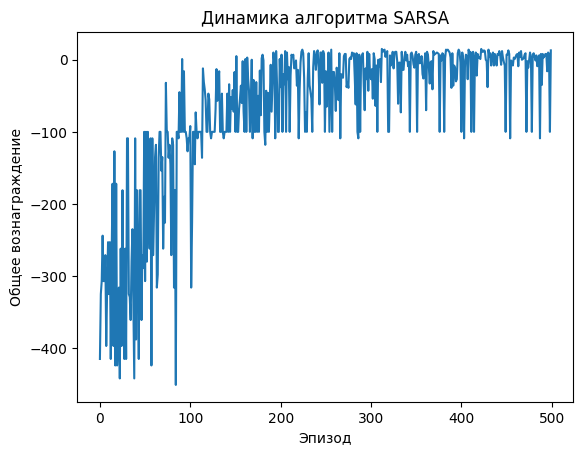




alpha check for SARSA: 100%|██████████| 3/3 [00:09<00:00,  3.25s/it]


trajectory_len check for SARSA:  33%|███▎      | 1/3 [00:09<00:19,  9.75s/it]


alpha check for SARSA:   0%|          | 0/3 [00:00<?, ?it/s]



Model:SARSA; gamma:0.1; trajectory_len:1000; alpha:0.1



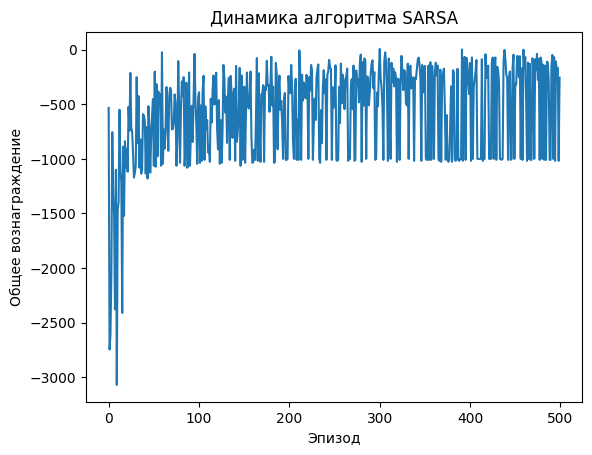




alpha check for SARSA:  33%|███▎      | 1/3 [00:21<00:42, 21.10s/it]



Model:SARSA; gamma:0.1; trajectory_len:1000; alpha:0.5



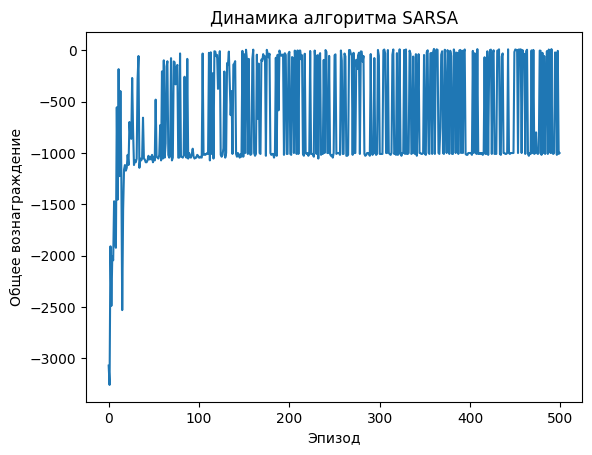




alpha check for SARSA:  67%|██████▋   | 2/3 [00:44<00:22, 22.62s/it]



Model:SARSA; gamma:0.1; trajectory_len:1000; alpha:0.99



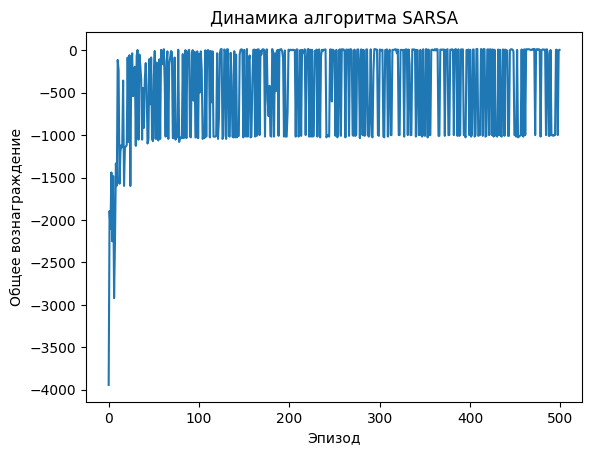




alpha check for SARSA: 100%|██████████| 3/3 [01:01<00:00, 20.52s/it]


trajectory_len check for SARSA:  67%|██████▋   | 2/3 [01:11<00:40, 40.24s/it]


alpha check for SARSA:   0%|          | 0/3 [00:00<?, ?it/s]



Model:SARSA; gamma:0.1; trajectory_len:5000; alpha:0.1



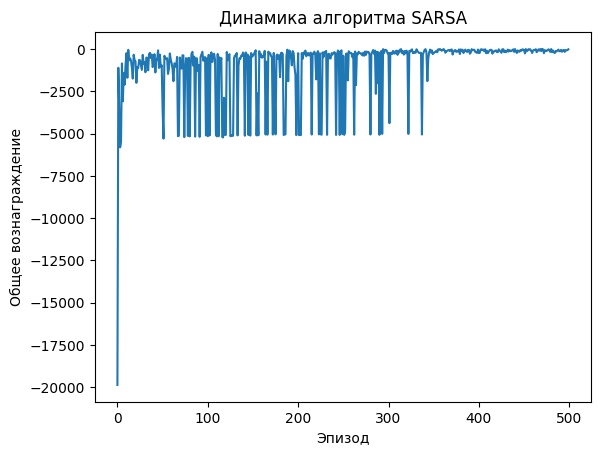




alpha check for SARSA:  33%|███▎      | 1/3 [00:34<01:09, 34.72s/it]



Model:SARSA; gamma:0.1; trajectory_len:5000; alpha:0.5



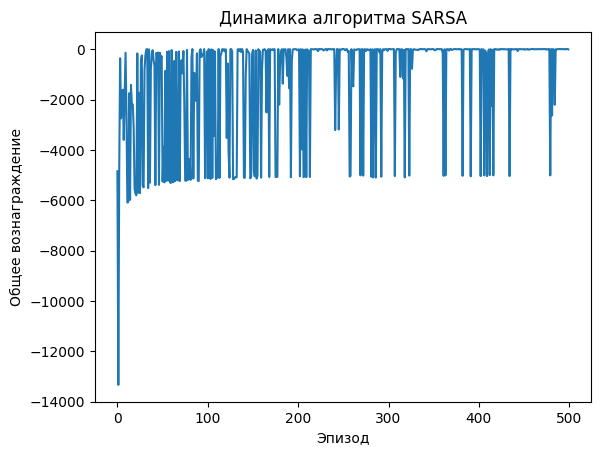




alpha check for SARSA:  67%|██████▋   | 2/3 [01:16<00:38, 38.90s/it]



Model:SARSA; gamma:0.1; trajectory_len:5000; alpha:0.99



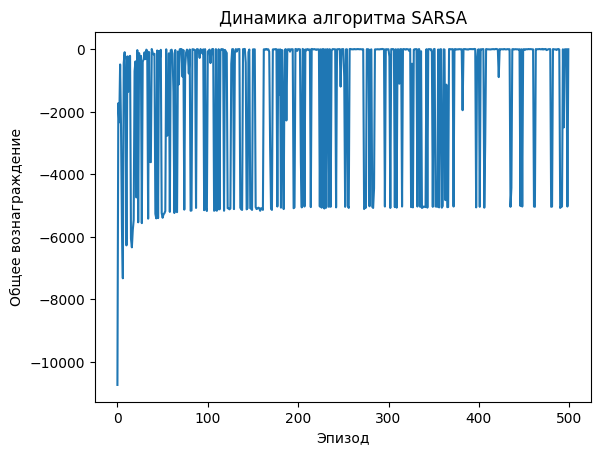




alpha check for SARSA: 100%|██████████| 3/3 [02:07<00:00, 42.58s/it]


trajectory_len check for SARSA: 100%|██████████| 3/3 [03:19<00:00, 66.36s/it]

gamma check for SARSA:  33%|███▎      | 1/3 [03:19<06:38, 199.12s/it]

trajectory_len check for SARSA:   0%|          | 0/3 [00:00<?, ?it/s]


alpha check for SARSA:   0%|          | 0/3 [00:00<?, ?it/s]



Model:SARSA; gamma:0.5; trajectory_len:100; alpha:0.1



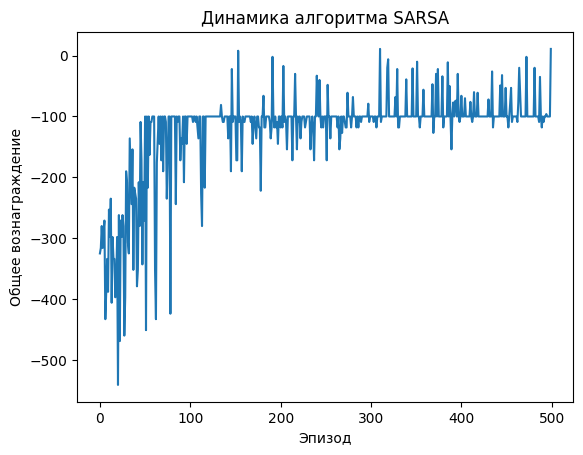




alpha check for SARSA:  33%|███▎      | 1/3 [00:04<00:08,  4.06s/it]



Model:SARSA; gamma:0.5; trajectory_len:100; alpha:0.5



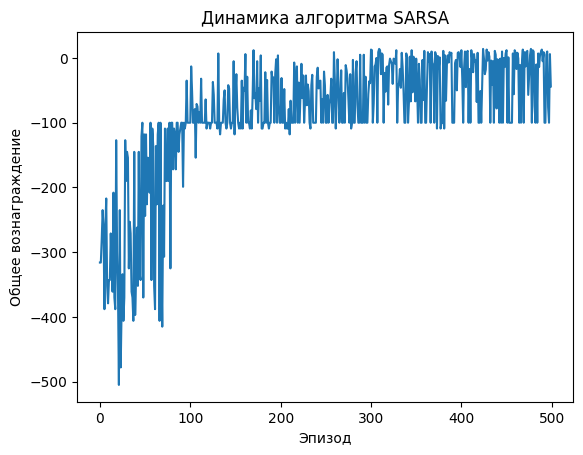




alpha check for SARSA:  67%|██████▋   | 2/3 [00:07<00:03,  3.78s/it]



Model:SARSA; gamma:0.5; trajectory_len:100; alpha:0.99



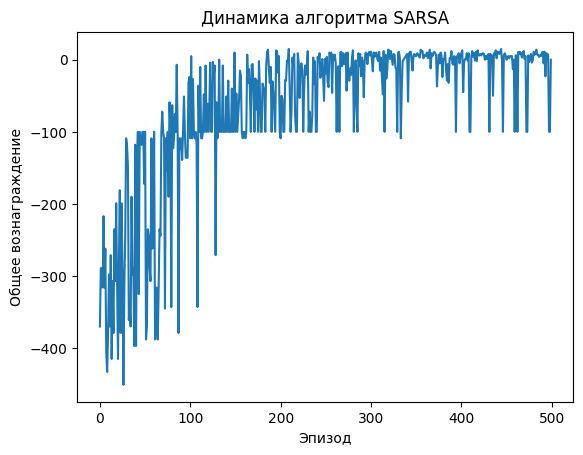




alpha check for SARSA: 100%|██████████| 3/3 [00:09<00:00,  3.23s/it]


trajectory_len check for SARSA:  33%|███▎      | 1/3 [00:09<00:19,  9.70s/it]


alpha check for SARSA:   0%|          | 0/3 [00:00<?, ?it/s]



Model:SARSA; gamma:0.5; trajectory_len:1000; alpha:0.1



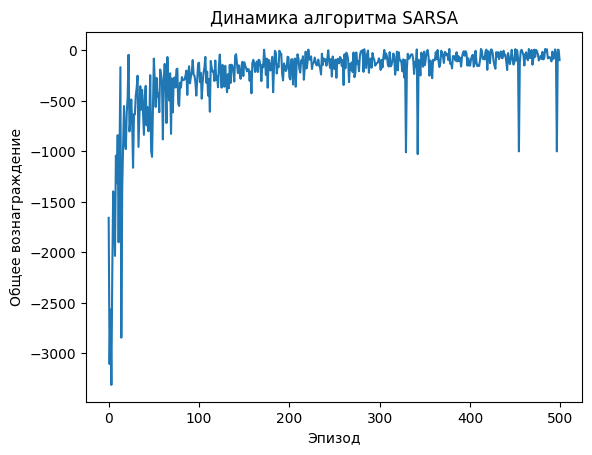




alpha check for SARSA:  33%|███▎      | 1/3 [00:08<00:16,  8.06s/it]



Model:SARSA; gamma:0.5; trajectory_len:1000; alpha:0.5



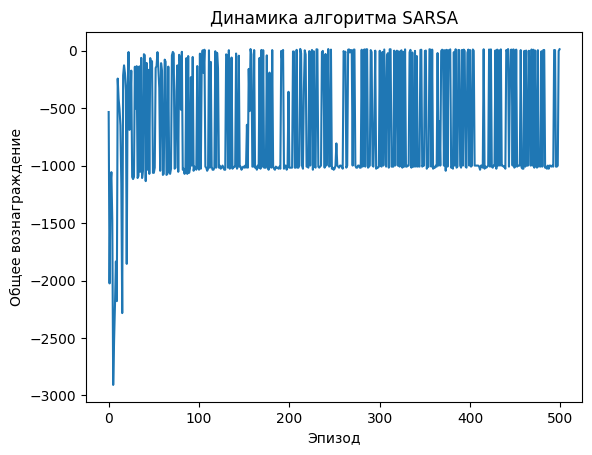




alpha check for SARSA:  67%|██████▋   | 2/3 [00:31<00:17, 17.32s/it]



Model:SARSA; gamma:0.5; trajectory_len:1000; alpha:0.99



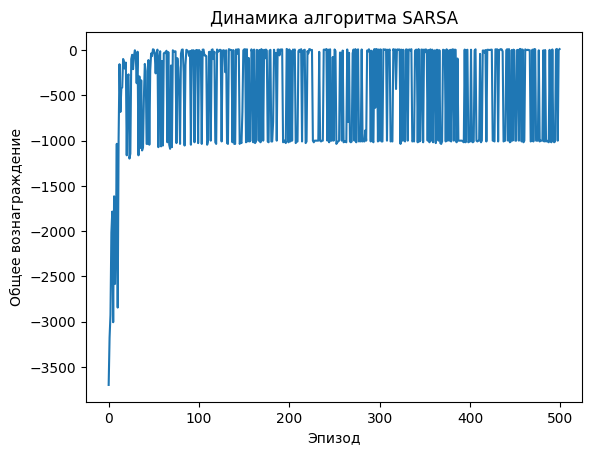




alpha check for SARSA: 100%|██████████| 3/3 [00:50<00:00, 16.67s/it]


trajectory_len check for SARSA:  67%|██████▋   | 2/3 [00:59<00:33, 33.43s/it]


alpha check for SARSA:   0%|          | 0/3 [00:00<?, ?it/s]



Model:SARSA; gamma:0.5; trajectory_len:5000; alpha:0.1



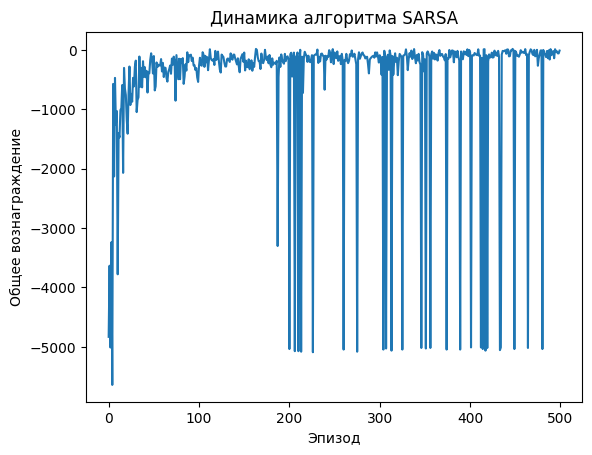




alpha check for SARSA:  33%|███▎      | 1/3 [00:17<00:35, 17.70s/it]



Model:SARSA; gamma:0.5; trajectory_len:5000; alpha:0.5



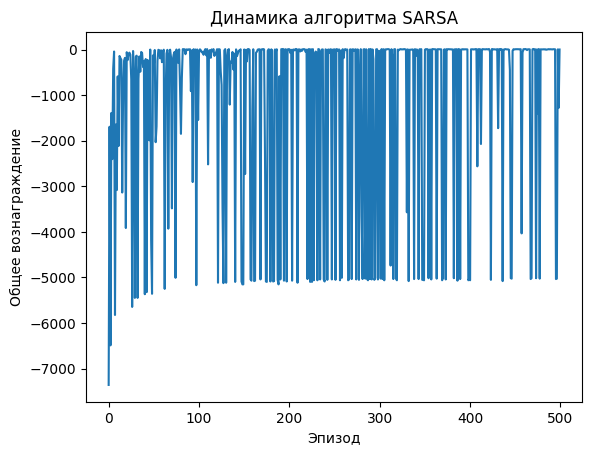




alpha check for SARSA:  67%|██████▋   | 2/3 [01:01<00:32, 32.99s/it]



Model:SARSA; gamma:0.5; trajectory_len:5000; alpha:0.99



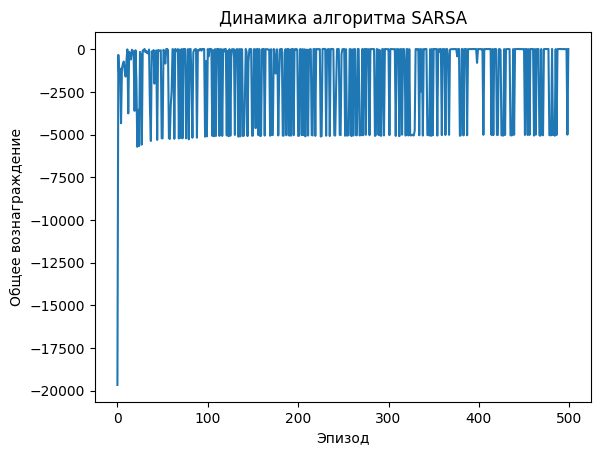




alpha check for SARSA: 100%|██████████| 3/3 [02:00<00:00, 40.07s/it]


trajectory_len check for SARSA: 100%|██████████| 3/3 [02:59<00:00, 59.98s/it]

gamma check for SARSA:  67%|██████▋   | 2/3 [06:19<03:07, 187.85s/it]

trajectory_len check for SARSA:   0%|          | 0/3 [00:00<?, ?it/s]


alpha check for SARSA:   0%|          | 0/3 [00:00<?, ?it/s]



Model:SARSA; gamma:0.99; trajectory_len:100; alpha:0.1



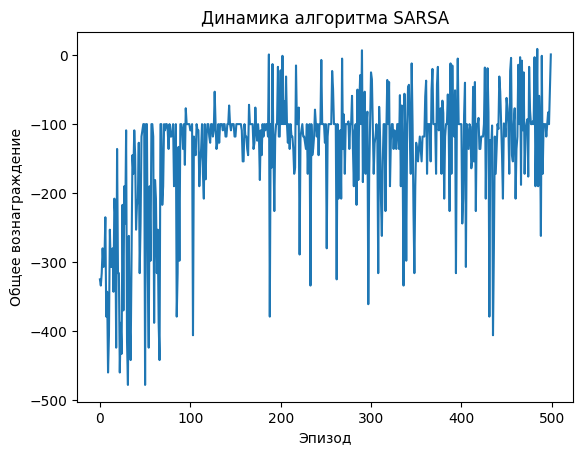




alpha check for SARSA:  33%|███▎      | 1/3 [00:03<00:07,  3.77s/it]



Model:SARSA; gamma:0.99; trajectory_len:100; alpha:0.5



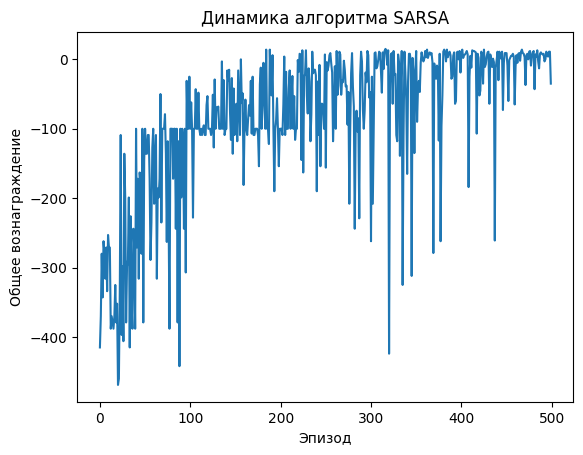




alpha check for SARSA:  67%|██████▋   | 2/3 [00:06<00:03,  3.43s/it]



Model:SARSA; gamma:0.99; trajectory_len:100; alpha:0.99



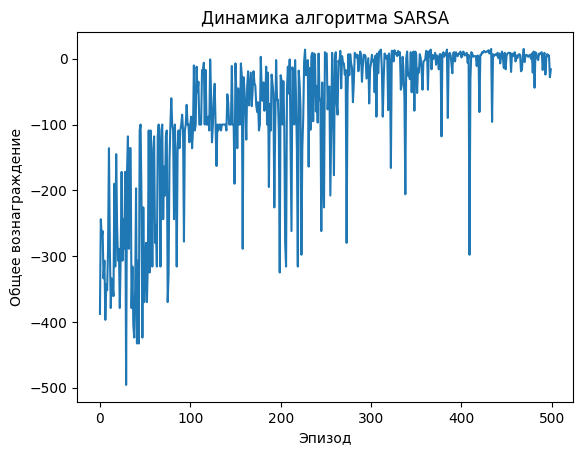




alpha check for SARSA: 100%|██████████| 3/3 [00:09<00:00,  3.10s/it]


trajectory_len check for SARSA:  33%|███▎      | 1/3 [00:09<00:18,  9.31s/it]


alpha check for SARSA:   0%|          | 0/3 [00:00<?, ?it/s]



Model:SARSA; gamma:0.99; trajectory_len:1000; alpha:0.1



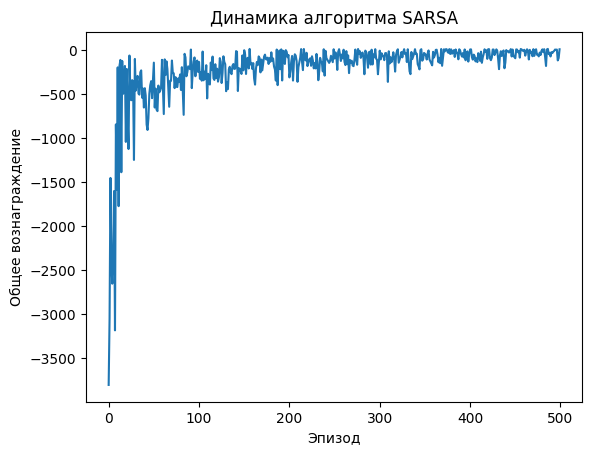




alpha check for SARSA:  33%|███▎      | 1/3 [00:05<00:11,  5.54s/it]



Model:SARSA; gamma:0.99; trajectory_len:1000; alpha:0.5



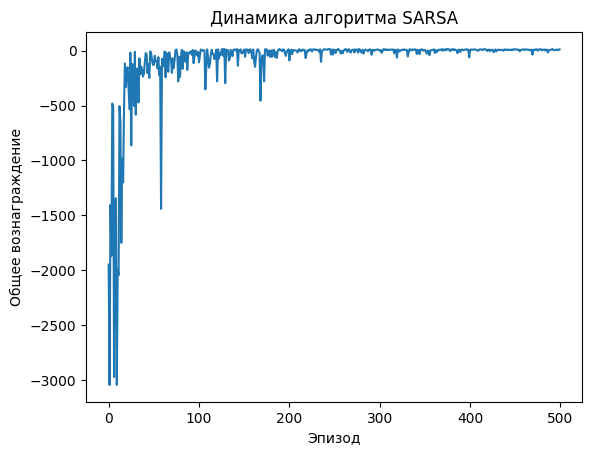




alpha check for SARSA:  67%|██████▋   | 2/3 [00:08<00:04,  4.02s/it]



Model:SARSA; gamma:0.99; trajectory_len:1000; alpha:0.99



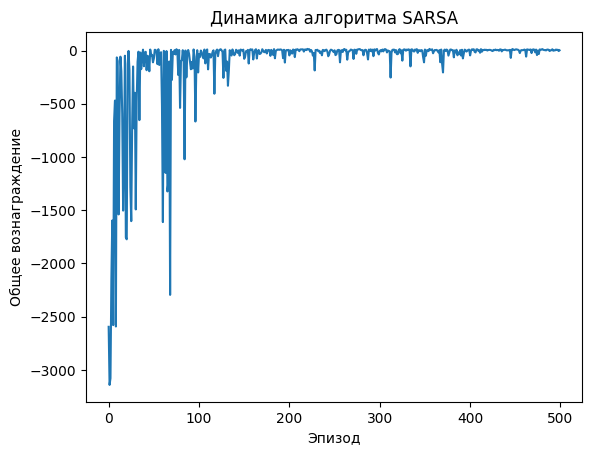




alpha check for SARSA: 100%|██████████| 3/3 [00:12<00:00,  4.07s/it]


trajectory_len check for SARSA:  67%|██████▋   | 2/3 [00:21<00:11, 11.02s/it]


alpha check for SARSA:   0%|          | 0/3 [00:00<?, ?it/s]



Model:SARSA; gamma:0.99; trajectory_len:5000; alpha:0.1



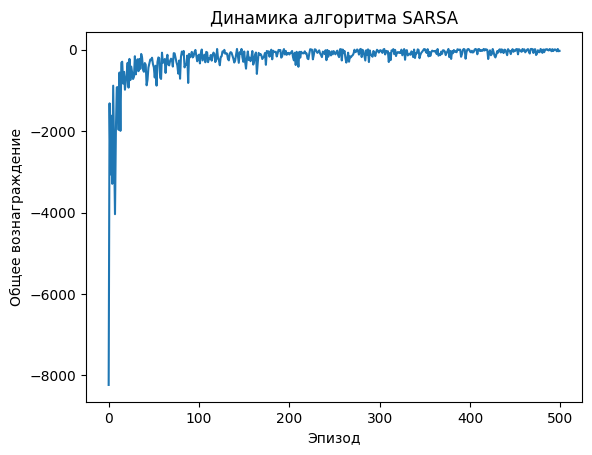




alpha check for SARSA:  33%|███▎      | 1/3 [00:05<00:11,  5.59s/it]



Model:SARSA; gamma:0.99; trajectory_len:5000; alpha:0.5



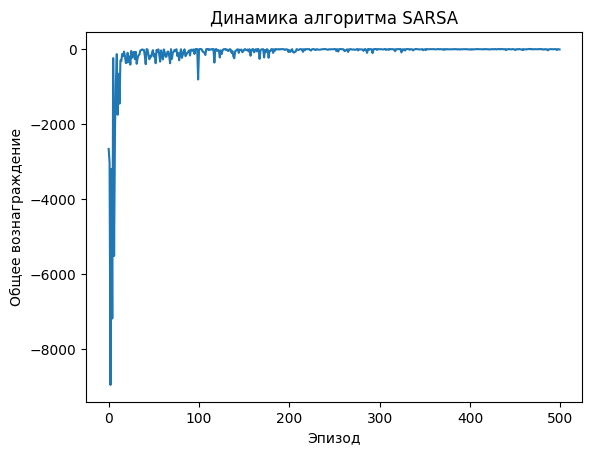




alpha check for SARSA:  67%|██████▋   | 2/3 [00:08<00:04,  4.03s/it]



Model:SARSA; gamma:0.99; trajectory_len:5000; alpha:0.99



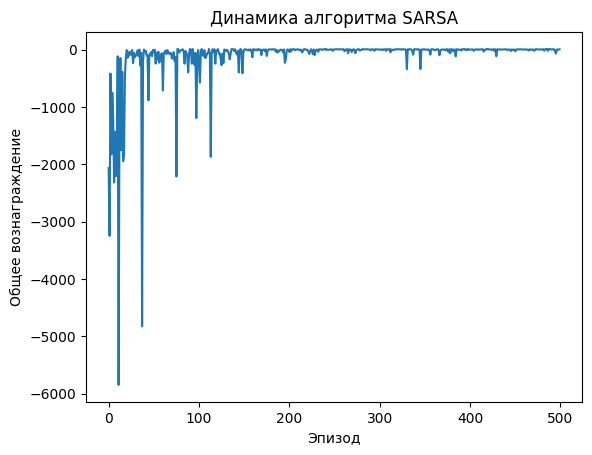




alpha check for SARSA: 100%|██████████| 3/3 [00:12<00:00,  4.18s/it]


trajectory_len check for SARSA: 100%|██████████| 3/3 [00:34<00:00, 11.37s/it]

gamma check for QLearning:   0%|          | 0/3 [00:00<?, ?it/s]

trajectory_len check for QLearning:   0%|          | 0/3 [00:00<?, ?it/s]


alpha check for QLearning:   0%|          | 0/3 [00:00<?, ?it/s]

Model:QLearning; gamma:0.1; trajectory_len:100; alpha:0.1



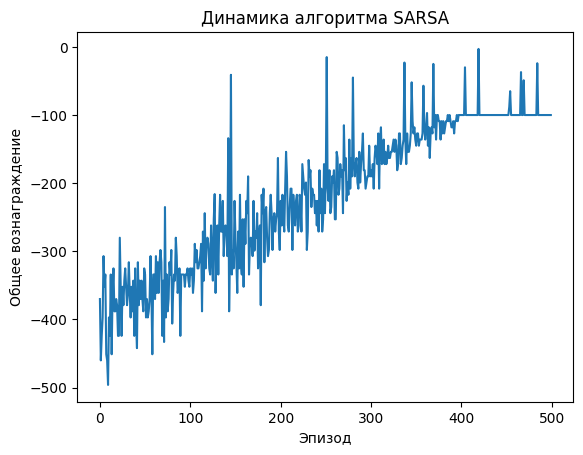




alpha check for QLearning:  33%|███▎      | 1/3 [00:04<00:08,  4.18s/it]

Model:QLearning; gamma:0.1; trajectory_len:100; alpha:0.5



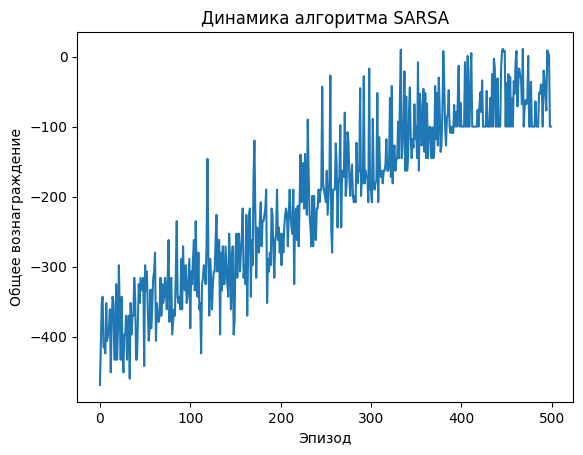




alpha check for QLearning:  67%|██████▋   | 2/3 [00:07<00:03,  3.90s/it]

Model:QLearning; gamma:0.1; trajectory_len:100; alpha:0.99



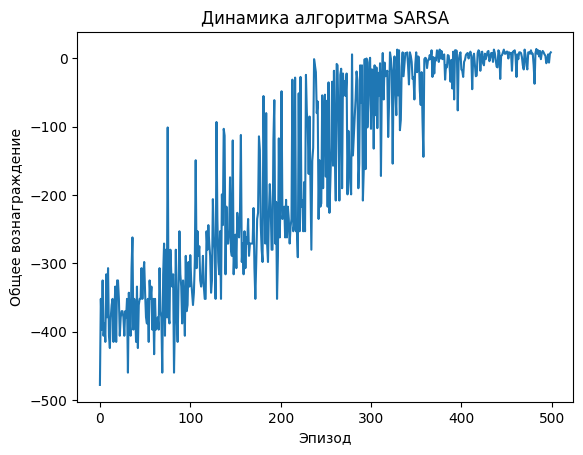




alpha check for QLearning: 100%|██████████| 3/3 [00:11<00:00,  3.71s/it]


trajectory_len check for QLearning:  33%|███▎      | 1/3 [00:11<00:22, 11.12s/it]


alpha check for QLearning:   0%|          | 0/3 [00:00<?, ?it/s]

Model:QLearning; gamma:0.1; trajectory_len:1000; alpha:0.1



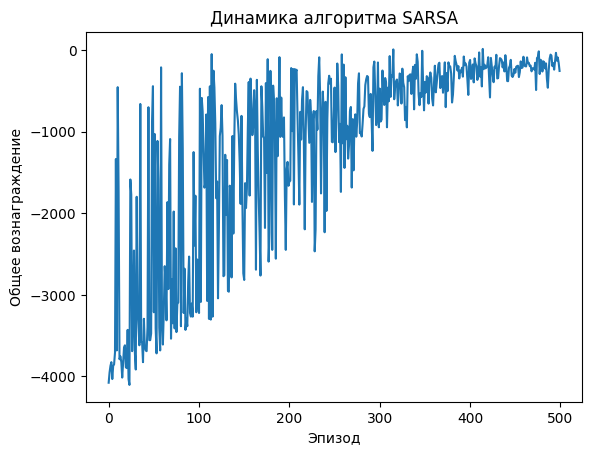




alpha check for QLearning:  33%|███▎      | 1/3 [00:18<00:37, 18.72s/it]

Model:QLearning; gamma:0.1; trajectory_len:1000; alpha:0.5



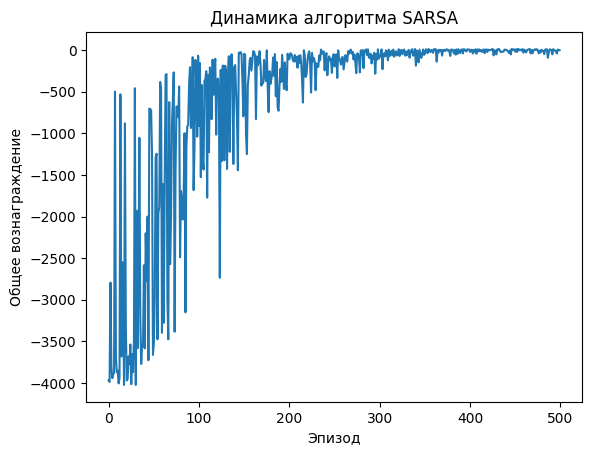




alpha check for QLearning:  67%|██████▋   | 2/3 [00:26<00:12, 12.39s/it]

Model:QLearning; gamma:0.1; trajectory_len:1000; alpha:0.99



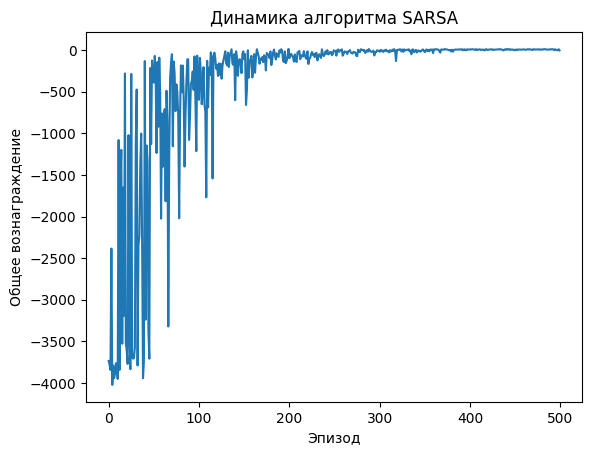




alpha check for QLearning: 100%|██████████| 3/3 [00:31<00:00, 10.51s/it]


trajectory_len check for QLearning:  67%|██████▋   | 2/3 [00:42<00:23, 23.14s/it]


alpha check for QLearning:   0%|          | 0/3 [00:00<?, ?it/s]

Model:QLearning; gamma:0.1; trajectory_len:5000; alpha:0.1



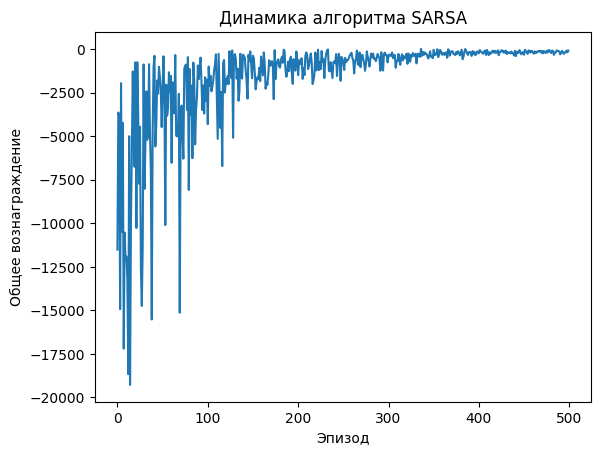




alpha check for QLearning:  33%|███▎      | 1/3 [00:23<00:47, 23.59s/it]

Model:QLearning; gamma:0.1; trajectory_len:5000; alpha:0.5



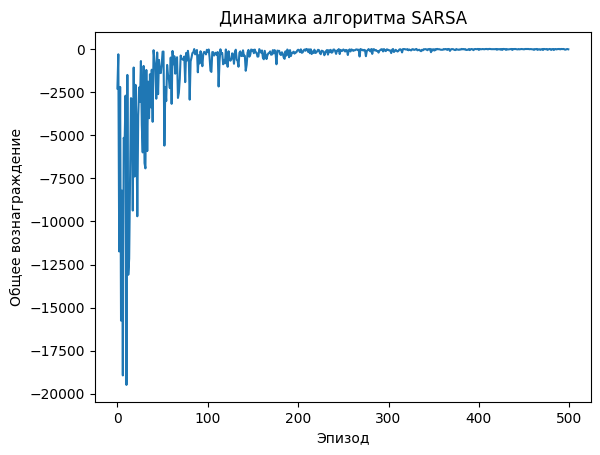




alpha check for QLearning:  67%|██████▋   | 2/3 [00:32<00:15, 15.24s/it]

Model:QLearning; gamma:0.1; trajectory_len:5000; alpha:0.99



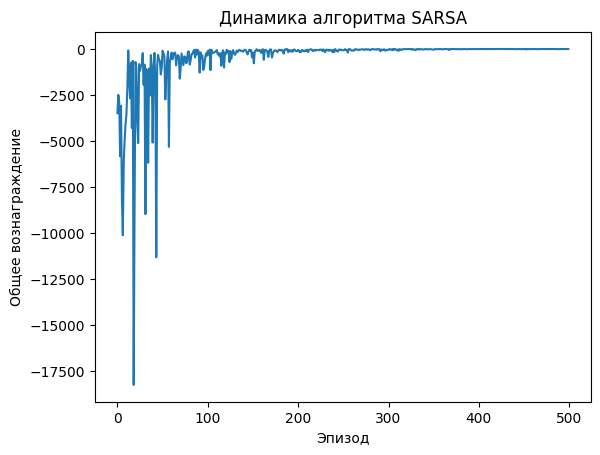




alpha check for QLearning: 100%|██████████| 3/3 [00:38<00:00, 12.95s/it]


trajectory_len check for QLearning: 100%|██████████| 3/3 [01:21<00:00, 27.18s/it]

gamma check for QLearning:  33%|███▎      | 1/3 [01:21<02:43, 81.54s/it]

trajectory_len check for QLearning:   0%|          | 0/3 [00:00<?, ?it/s]


alpha check for QLearning:   0%|          | 0/3 [00:00<?, ?it/s]

Model:QLearning; gamma:0.5; trajectory_len:100; alpha:0.1



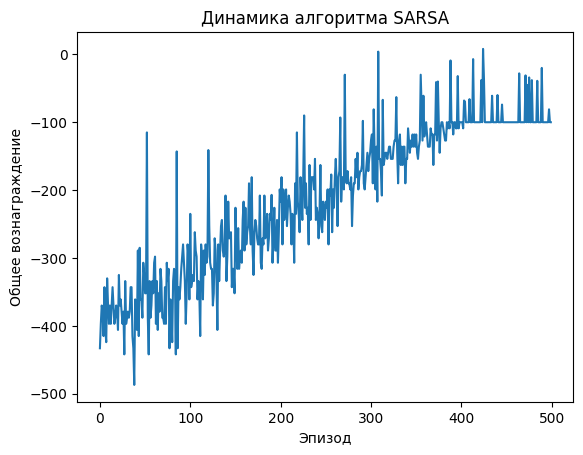




alpha check for QLearning:  33%|███▎      | 1/3 [00:04<00:08,  4.12s/it]

Model:QLearning; gamma:0.5; trajectory_len:100; alpha:0.5



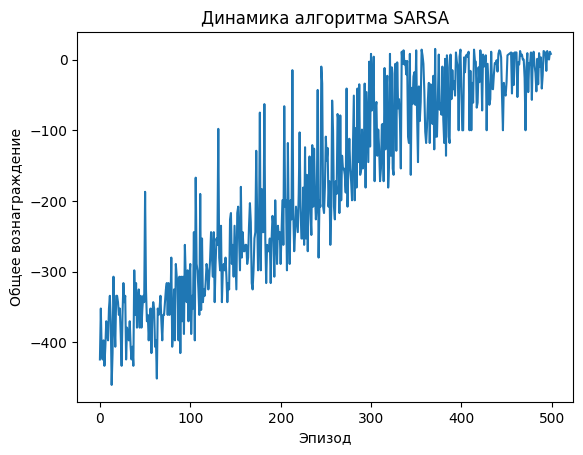




alpha check for QLearning:  67%|██████▋   | 2/3 [00:07<00:03,  3.82s/it]

Model:QLearning; gamma:0.5; trajectory_len:100; alpha:0.99



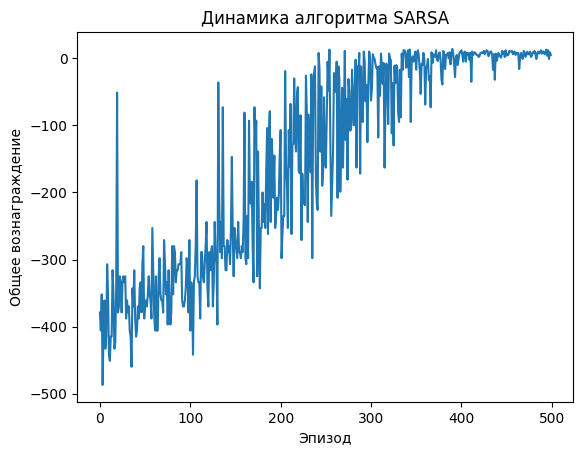




alpha check for QLearning: 100%|██████████| 3/3 [00:10<00:00,  3.60s/it]


trajectory_len check for QLearning:  33%|███▎      | 1/3 [00:10<00:21, 10.82s/it]


alpha check for QLearning:   0%|          | 0/3 [00:00<?, ?it/s]

Model:QLearning; gamma:0.5; trajectory_len:1000; alpha:0.1



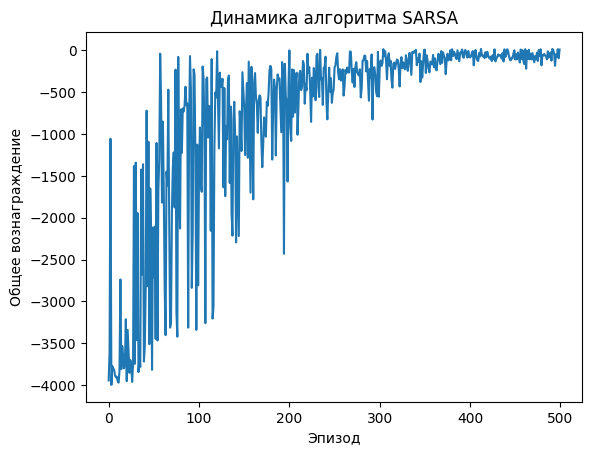




alpha check for QLearning:  33%|███▎      | 1/3 [00:15<00:30, 15.14s/it]

Model:QLearning; gamma:0.5; trajectory_len:1000; alpha:0.5



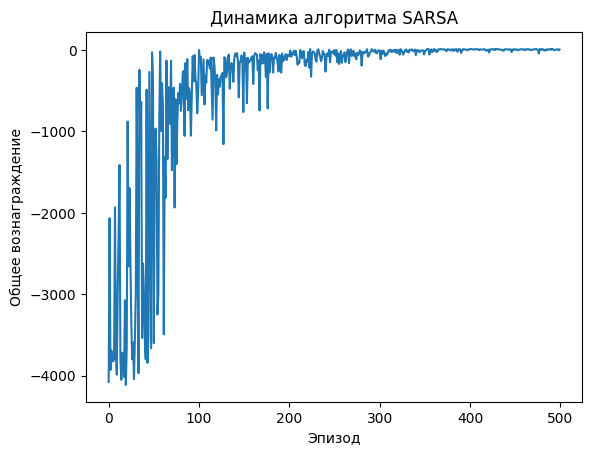




alpha check for QLearning:  67%|██████▋   | 2/3 [00:21<00:10, 10.16s/it]

Model:QLearning; gamma:0.5; trajectory_len:1000; alpha:0.99



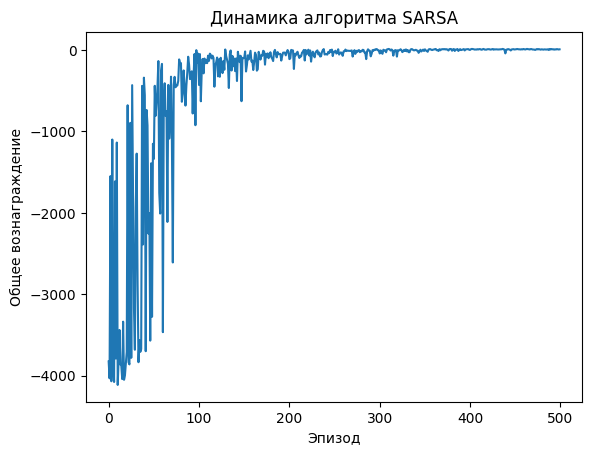




alpha check for QLearning: 100%|██████████| 3/3 [00:28<00:00,  9.61s/it]


trajectory_len check for QLearning:  67%|██████▋   | 2/3 [00:39<00:21, 21.42s/it]


alpha check for QLearning:   0%|          | 0/3 [00:00<?, ?it/s]

Model:QLearning; gamma:0.5; trajectory_len:5000; alpha:0.1



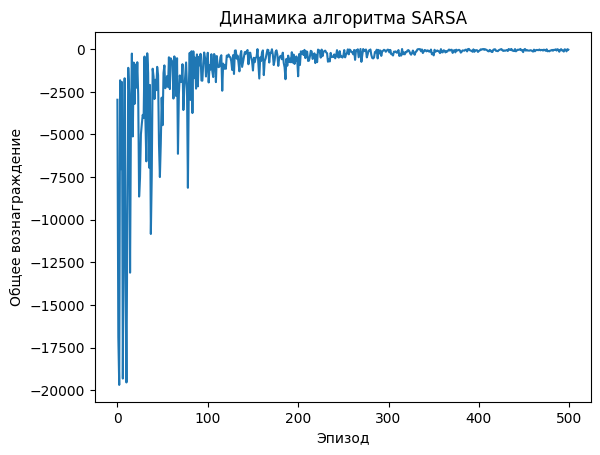




alpha check for QLearning:  33%|███▎      | 1/3 [00:13<00:26, 13.11s/it]

Model:QLearning; gamma:0.5; trajectory_len:5000; alpha:0.5



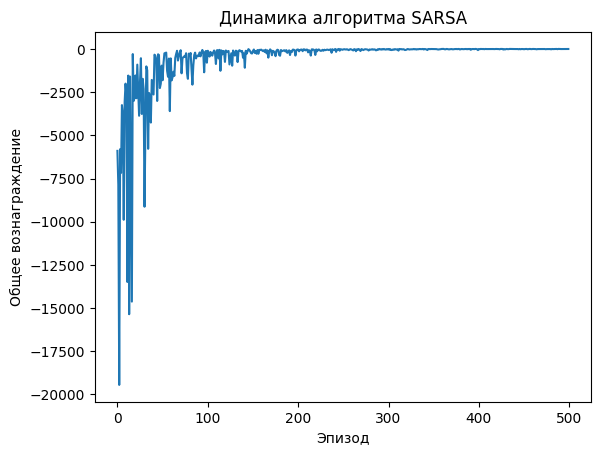




alpha check for QLearning:  67%|██████▋   | 2/3 [00:19<00:09,  9.14s/it]

Model:QLearning; gamma:0.5; trajectory_len:5000; alpha:0.99



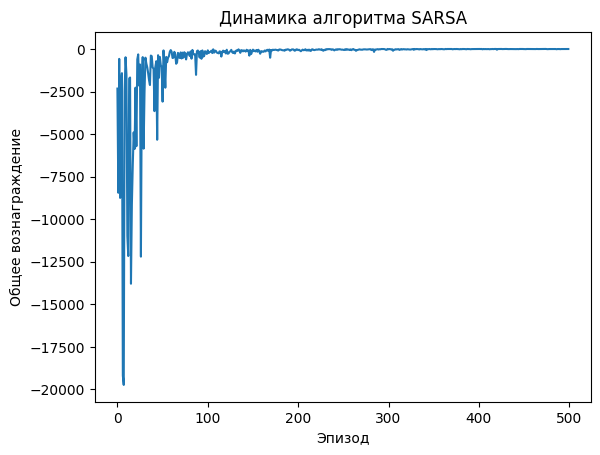




alpha check for QLearning: 100%|██████████| 3/3 [00:27<00:00,  9.16s/it]


trajectory_len check for QLearning: 100%|██████████| 3/3 [01:07<00:00, 22.39s/it]

gamma check for QLearning:  67%|██████▋   | 2/3 [02:28<01:13, 73.10s/it]

trajectory_len check for QLearning:   0%|          | 0/3 [00:00<?, ?it/s]


alpha check for QLearning:   0%|          | 0/3 [00:00<?, ?it/s]

Model:QLearning; gamma:0.99; trajectory_len:100; alpha:0.1



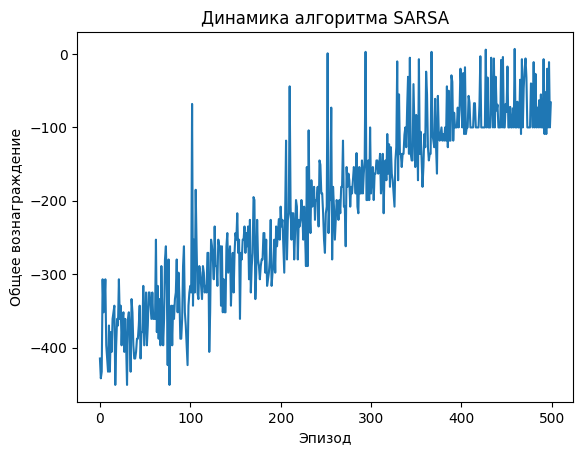




alpha check for QLearning:  33%|███▎      | 1/3 [00:05<00:11,  5.61s/it]

Model:QLearning; gamma:0.99; trajectory_len:100; alpha:0.5



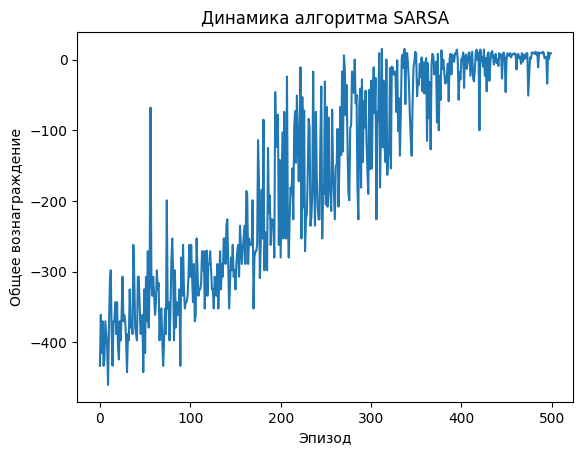




alpha check for QLearning:  67%|██████▋   | 2/3 [00:11<00:06,  6.00s/it]

Model:QLearning; gamma:0.99; trajectory_len:100; alpha:0.99



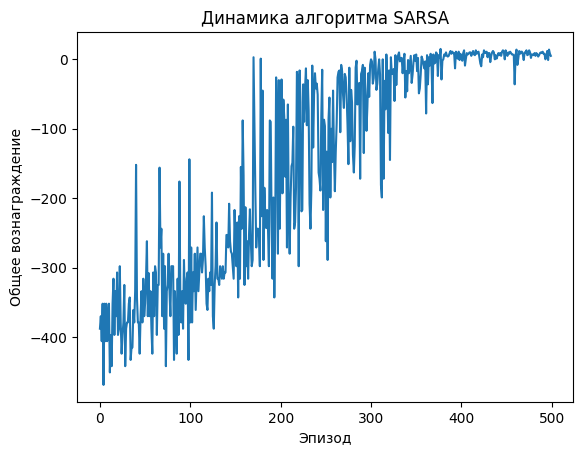




alpha check for QLearning: 100%|██████████| 3/3 [00:15<00:00,  5.01s/it]


trajectory_len check for QLearning:  33%|███▎      | 1/3 [00:15<00:30, 15.05s/it]


alpha check for QLearning:   0%|          | 0/3 [00:00<?, ?it/s]

Model:QLearning; gamma:0.99; trajectory_len:1000; alpha:0.1



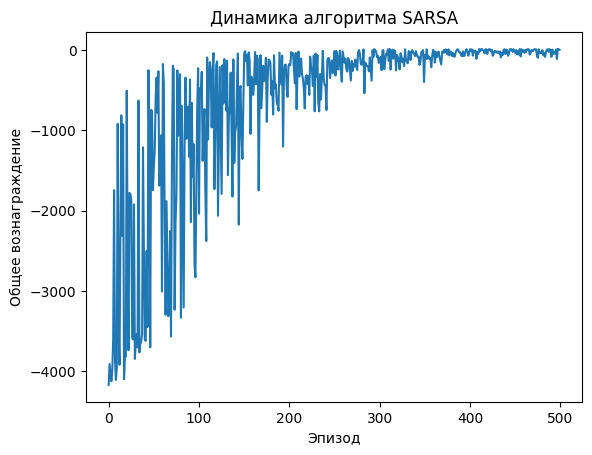




alpha check for QLearning:  33%|███▎      | 1/3 [00:09<00:19,  9.78s/it]

Model:QLearning; gamma:0.99; trajectory_len:1000; alpha:0.5



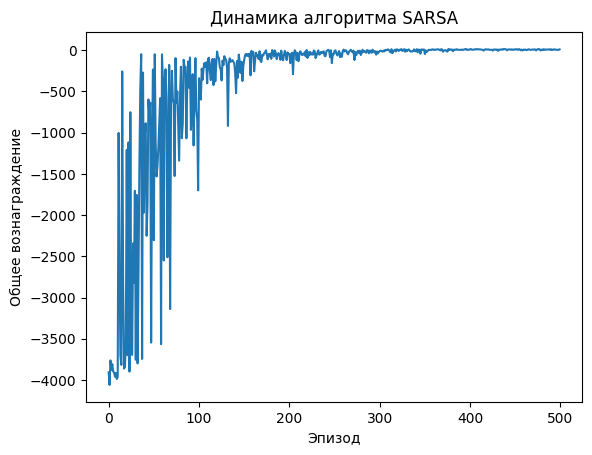




alpha check for QLearning:  67%|██████▋   | 2/3 [00:14<00:06,  6.87s/it]

Model:QLearning; gamma:0.99; trajectory_len:1000; alpha:0.99



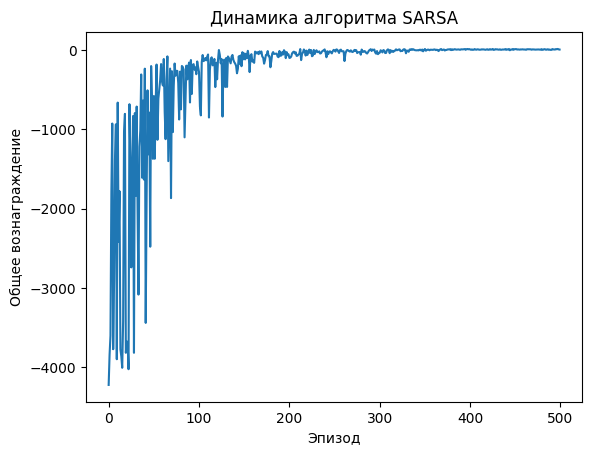




alpha check for QLearning: 100%|██████████| 3/3 [00:19<00:00,  6.36s/it]


trajectory_len check for QLearning:  67%|██████▋   | 2/3 [00:34<00:17, 17.42s/it]


alpha check for QLearning:   0%|          | 0/3 [00:00<?, ?it/s]

Model:QLearning; gamma:0.99; trajectory_len:5000; alpha:0.1



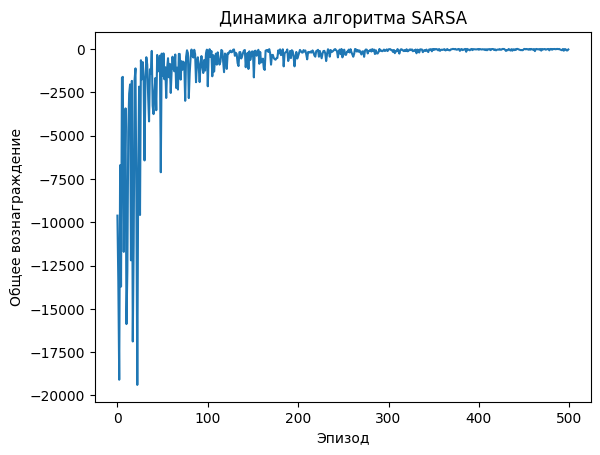




alpha check for QLearning:  33%|███▎      | 1/3 [00:09<00:19,  9.77s/it]

Model:QLearning; gamma:0.99; trajectory_len:5000; alpha:0.5



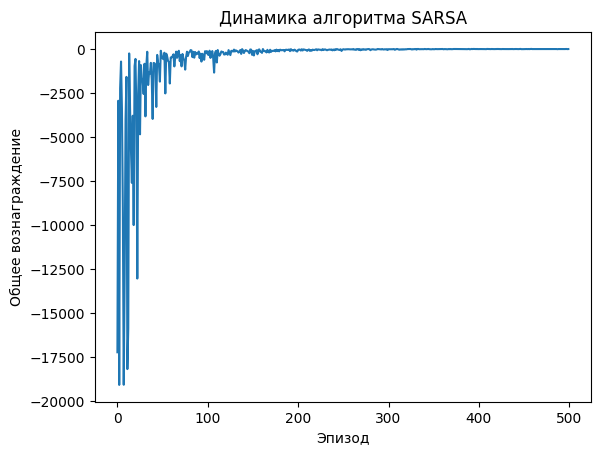




alpha check for QLearning:  67%|██████▋   | 2/3 [00:16<00:08,  8.16s/it]

Model:QLearning; gamma:0.99; trajectory_len:5000; alpha:0.99



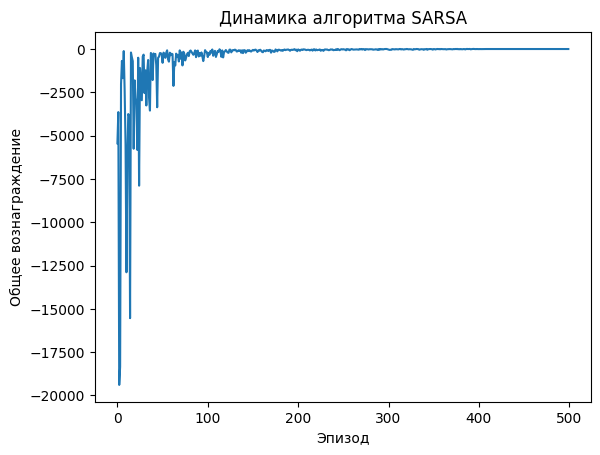




alpha check for QLearning: 100%|██████████| 3/3 [00:21<00:00,  7.19s/it]


trajectory_len check for QLearning: 100%|██████████| 3/3 [00:55<00:00, 18.57s/it]

Model Check: 100%|██████████| 2/2 [10:17<00:00, 308.84s/it]


In [18]:
from tqdm import tqdm

env = gym.make("Taxi-v3")

combinations_SARSA = []

combinations_QLearning = []

for model_name in tqdm(model_dict.keys(), desc='Model Check'):
  for gamma in tqdm(model_parametrs['gamma'], desc = f'gamma check for {model_name}'):
    for trajectory_len in tqdm(model_parametrs['trajectory_len'], desc = f'trajectory_len check for {model_name}'):
      for alpha in tqdm(model_parametrs['alpha'], desc = f'alpha check for {model_name}'):
        if model_name == 'SARSA':
          print(f'\n\nModel:{model_name}; gamma:{gamma}; trajectory_len:{trajectory_len}; alpha:{alpha}\n')
          reward_SARSA = model_dict[model_name](env, episode_n=500, trajectory_len=trajectory_len, gamma=gamma, alpha=alpha)
          combinations_SARSA.append(((trajectory_len,gamma,alpha),reward_SARSA))
          plt.plot(reward_SARSA)
          plt.title('Динамика алгоритма SARSA')
          plt.xlabel('Эпизод')
          plt.ylabel('Общее вознаграждение')
          plt.show()
        else:
          print(f'Model:{model_name}; gamma:{gamma}; trajectory_len:{trajectory_len}; alpha:{alpha}\n')
          reward_Qlearning = model_dict[model_name](env, episode_n=500, noisy_episode_n=400, t_max=trajectory_len, gamma=gamma, alpha=alpha)
          combinations_QLearning.append(((trajectory_len,gamma,alpha),reward_Qlearning))
          plt.plot(reward_Qlearning)
          plt.title('Динамика алгоритма SARSA')
          plt.xlabel('Эпизод')
          plt.ylabel('Общее вознаграждение')
          plt.show()




# Check best position

In [77]:
# sorted_combinations_SARSA = []
# sorted_combinations_QLearning = []

def check_top3_reward(combinations: list):
  prepare_combination = []
  top3_combination = []
  for combination in combinations:
    prepare_combination.append((combination[0],sum(combination[1][-50:-1]),combination[1]))

  top3_combination = sorted(prepare_combination, key=lambda x: x[1], reverse = True)[:3]
  return top3_combination

sorted_combinations_SARSA = check_top3_reward(combinations_SARSA)
sorted_combinations_QLearning = check_top3_reward(combinations_QLearning)

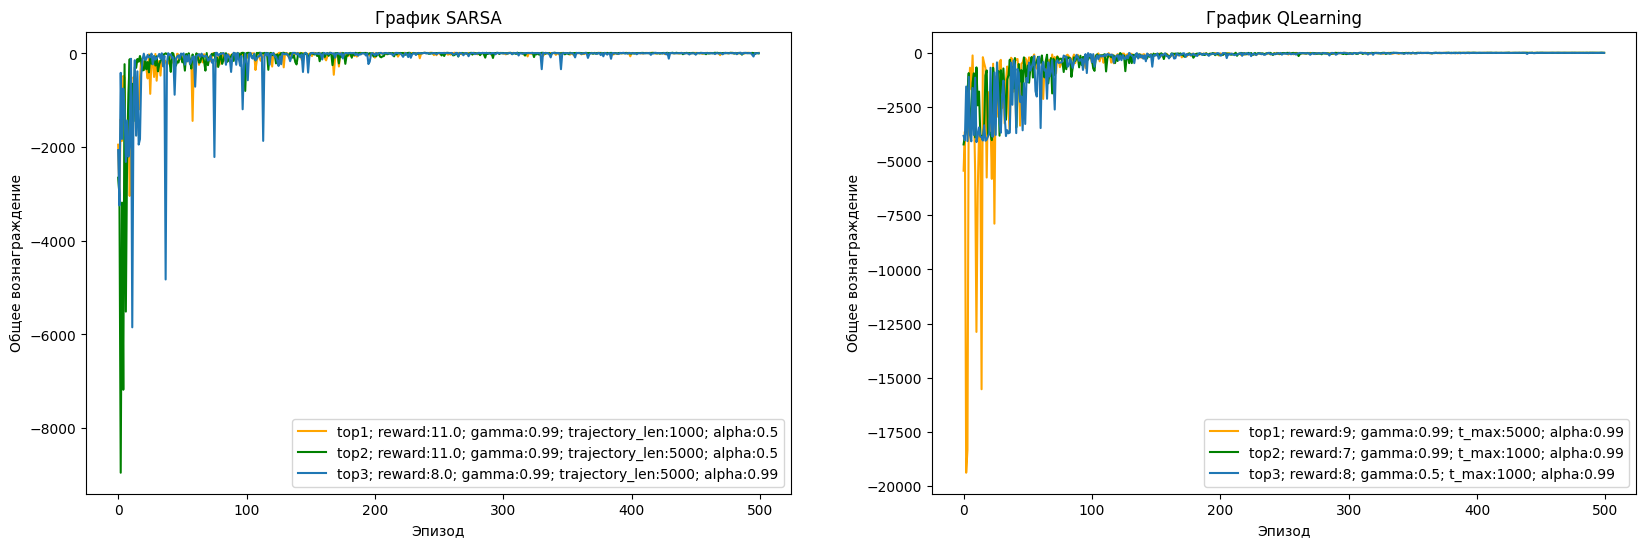

In [82]:
## Create visual of graphics stability and reward SARSA

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.plot(sorted_combinations_SARSA[0][2], color='orange', label=f'top1; reward:{sorted_combinations_SARSA[0][2][len(sorted_combinations_SARSA[0][2])-1]}; gamma:{sorted_combinations_SARSA[0][0][1]}; trajectory_len:{sorted_combinations_SARSA[0][0][0]}; alpha:{sorted_combinations_SARSA[0][0][2]}')
ax1.plot(sorted_combinations_SARSA[1][2], color='green', label=f'top2; reward:{sorted_combinations_SARSA[0][2][len(sorted_combinations_SARSA[1][2])-1]}; gamma:{sorted_combinations_SARSA[1][0][1]}; trajectory_len:{sorted_combinations_SARSA[1][0][0]}; alpha:{sorted_combinations_SARSA[1][0][2]}')
ax1.plot(sorted_combinations_SARSA[2][2], label=f'top3; reward:{sorted_combinations_SARSA[2][2][len(sorted_combinations_SARSA[2][2])-1]}; gamma:{sorted_combinations_SARSA[2][0][1]}; trajectory_len:{sorted_combinations_SARSA[2][0][0]}; alpha:{sorted_combinations_SARSA[2][0][2]}')
ax1.set_title(f'График SARSA')
ax1.set_xlabel('Эпизод')
ax1.set_ylabel('Общее вознаграждение')
ax1.legend()

ax2.plot(sorted_combinations_QLearning[0][2], color='orange', label=f'top1; reward:{sorted_combinations_QLearning[0][2][len(sorted_combinations_QLearning[0][2])-1]}; gamma:{sorted_combinations_QLearning[0][0][1]}; t_max:{sorted_combinations_QLearning[0][0][0]}; alpha:{sorted_combinations_QLearning[0][0][2]}')
ax2.plot(sorted_combinations_QLearning[1][2], color='green', label=f'top2; reward:{sorted_combinations_QLearning[1][2][len(sorted_combinations_QLearning[1][2])-1]}; gamma:{sorted_combinations_QLearning[1][0][1]}; t_max:{sorted_combinations_QLearning[1][0][0]}; alpha:{sorted_combinations_QLearning[1][0][2]}')
ax2.plot(sorted_combinations_QLearning[2][2], label=f'top3; reward:{sorted_combinations_QLearning[2][2][len(sorted_combinations_QLearning[2][2])-1]}; gamma:{sorted_combinations_QLearning[2][0][1]}; t_max:{sorted_combinations_QLearning[2][0][0]}; alpha:{sorted_combinations_QLearning[2][0][2]}')
ax2.set_title(f'График QLearning')
ax2.set_xlabel('Эпизод')
ax2.set_ylabel('Общее вознаграждение')
ax2.legend()

# Conclusions

Как видно из результатов, в случае QLearning наиболее важно число шагов, в то время как для SARSA зависит от всех параметров и выделить наиболее важный не выходит. Также стоит отметить, что QLearning более стабилен, чем SARSA.

P.S. отбор top3 проходило по стабильности конечных точек через их сумму)